#  Recommender System
MSDS_696 Data Science Practicum II

Corrie Meyersick

## Project Purpose

The purpose of this project is to build an item-based recommender system using a data set provided by the UCI Machine learning repository. 

## The Data

The Online Retail dataset was retrieved from the UCI machine learning repository and contains all transactions that occurred between 01/12/2010 and 09/12/2011 for an online retailer based in the UK.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  
%matplotlib inline
from datetime import date
from datetime import time
from datetime import datetime

In [3]:
#import dataset and view the first few rows
retail = pd.read_excel('/Users/corrie/MSDS_696 Data Science Practicum II/Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Data Cleanup

The info command is used to determine the different columns and data types within the dataframe.

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


The majority of the columns are object, int64, and float 64. The InvoiceDate is shown as an object. For analysis purposes this will be changed to the DateTime type. The info command also shows where the non-null fields are. From this output it can be determined that the majoirty of the missing values are within the CustomerID field. Because the information on the items is still important regardless on if there is not a customer number, the null values in the customer ID field should be replaced with an equivelent.

Since the Customer ID is not needed for calculations, this is changed to an object rather than float64

In [5]:
retail['CustomerID'] = retail['CustomerID'].astype(str)
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


The following is used to determine if there are any missing values within the dataset and the shape. 

In [6]:
np.shape(retail) #determine shape of the df  this shows that there are 541,909 rows and 8 columms for this dataset

(541909, 8)

In [7]:
np.count_nonzero(retail.isnull()) #missing value count

1454

In [8]:
#replace null values in the Customer ID column with "unknown"
retail['CustomerID']=retail['CustomerID'].apply(lambda x: x.replace('NaN','Unknown'))

In [9]:
#determine how many additional null values need to be addressed
np.count_nonzero(retail.isnull())

1454

In [10]:
#view the info to see which columns still have null values
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


The description field is still showing null values. Because it is the description of the item it does not make sense to backfill, forward fill, or use the mean to replace the null values. In order to still be able to perform analysis on the unknown items, it is decided to update the null values in this column to say "Unknown"

In [11]:
#change type on the description column. Otherwise errors will be received
retail['Description'] = retail['Description'].astype(str)

In [12]:
#replace null values in the description field with "unknown"
retail['Description']=retail['Description'].apply(lambda x: x.replace('NaN','Unknown'))

In [13]:
#check/verify null values have been addressed
np.count_nonzero(retail.isnull())

0

Previous command indicates that all of the null values have beene addressed and the info command is used to verify

In [14]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Change InvoiceDate to datetime format

In [15]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    541909 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     541909 non-null object
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


Create a new column for Year-Month from the invoice date

In [16]:
retail['Year-Month'] = retail.InvoiceDate.map(lambda x: x.strftime('%Y-%m'))
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12


Create new columns for year and month from invoice date

In [17]:
retail['Year'] = retail['InvoiceDate'].dt.year
retail['Month'] = retail['InvoiceDate'].dt.month
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12


In [18]:
#view the different keys for the Year-Month column. This shows the range that the dataset is in
retail.groupby(['Year-Month']).groups.keys()

dict_keys(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12'])

In [19]:
#change the Year-Month column to datetime format
retail['Year-Month'] = pd.to_datetime(retail['Year-Month'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12


Note that the Year-Month column reverted back to the YYYY-MM-DD format rather than just YYYY-MM so we will need to change the format again.

In [20]:
#change Year-Month column to only show year and month
retail['Year-Month']=retail['Year-Month'].dt.strftime('%Y-%m')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12


A new column, LineItemTotal, is created to calculate the price for the total line item on invoices.

In [21]:
#calculate the line item total based on the quantity and unit price
retail['LineItemTotal'] = retail['Quantity'] * retail['UnitPrice']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34


Using the Quantity column, we identify items that are returned. A new column is created and if the quantity is less than 0, then the a value of '-1' is added input to indicate that the item was returned

In [22]:
retail.loc[retail.Quantity<0, 'Returned']='-1'
retail.loc[retail.Quantity>=0, 'Returned']='0'
retail.loc[236:250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,-1
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12,2010,12,-41.40,-1
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-19.80,-1
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-39.60,-1
242,536392,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-01 10:29:00,1.95,13705.0,United Kingdom,2010-12,2010,12,11.70,0
243,536392,22619,SET OF 6 SOLDIER SKITTLES,4,2010-12-01 10:29:00,3.75,13705.0,United Kingdom,2010-12,2010,12,15.00,0
244,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,0
245,536392,21889,WOODEN BOX OF DOMINOES,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,0


In [25]:
############### Note: this section is no longer necessary  #################
##this was orignially created to identify items that were returned
## although it is functional, a different method was used after this
## was ran and created the Returned column
## creation of returned column may be needed for previous if error occurs


#Identify substring to be searched for
sub='C'
#create and pass series new column
retail['Returned']=retail['InvoiceNo'].str.find(sub)
#view data to verify changes
retail.loc[236:250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,0.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,0.0
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12,2010,12,-6.96,0.0
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,2010-12,2010,12,-41.40,0.0
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-19.80,0.0
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12,2010,12,-39.60,0.0
242,536392,22150,3 STRIPEY MICE FELTCRAFT,6,2010-12-01 10:29:00,1.95,13705.0,United Kingdom,2010-12,2010,12,11.70,NaN
243,536392,22619,SET OF 6 SOLDIER SKITTLES,4,2010-12-01 10:29:00,3.75,13705.0,United Kingdom,2010-12,2010,12,15.00,NaN
244,536392,21891,TRADITIONAL WOODEN SKIPPING ROPE,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,NaN
245,536392,21889,WOODEN BOX OF DOMINOES,12,2010-12-01 10:29:00,1.25,13705.0,United Kingdom,2010-12,2010,12,15.00,NaN


In [26]:
#change Returned from Object to int64
retail['Returned']=retail['Returned'].astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [27]:
Items = [retail['StockCode'].unique().tolist()]
Items.sort()
print('Sorted list:',Items)

Sorted list: [['85123A', 71053, '84406B', '84029G', '84029E', 22752, 21730, 22633, 22632, 84879, 22745, 22748, 22749, 22310, 84969, 22623, 22622, 21754, 21755, 21777, 48187, 22960, 22913, 22912, 22914, 21756, 22728, 22727, 22726, 21724, 21883, 10002, 21791, 21035, 22326, 22629, 22659, 22631, 22661, 21731, 22900, 21913, 22540, 22544, 22492, 'POST', 22086, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, '82494L', 21258, 22114, 21733, 22386, '85099C', 21033, 20723, '84997B', '84997C', 21094, 20725, 21559, 22352, 21212, 21975, 21977, 84991, '84519A', '85183B', '85071B', 21931, 21929, 22961, 22139, 84854, 22411, 82567, 21672, 22774, 22771, 71270, 22262, 22637, 21934, 21169, 21166, 21175, '37444A', '37444C', 22083, '84971S', 47580, 22261, 84832, 22644, 21533, 21557, '15056BL', '15056N', 22646, 22176, 22438, 22778, 22719, 21523, 'D', 21912, 21832, 22379, 22381, 22798, 22926, 22839, 22838, 22783, '35004C', 82484, 84755, 22464, 21324, 22457, 22469, 22470, 22224, 21340, 22189, 22427, 224

There are a number of items listed in the dataset that are not needed for the recommender system. Some of these include discounts, fees, postage, and gift cards. 
These items are identified and a new df is created (retail2)

In [28]:
#view original full dataset stats
retail.describe()

,Quantity,UnitPrice,Year,Month,LineItemTotal,Returned
count,541909.000000,541909.000000,541909.000000,541909.000000,541909.000000,9291.000000
mean,9.552250,4.611114,2010.921609,7.553128,17.987795,-0.000323
std,218.081158,96.759853,0.268787,3.509055,378.810824,0.017967
min,-80995.000000,-11062.060000,2010.000000,1.000000,-168469.600000,-1.000000
25%,1.000000,1.250000,2011.000000,5.000000,3.400000,0.000000
50%,3.000000,2.080000,2011.000000,8.000000,9.750000,0.000000
75%,10.000000,4.130000,2011.000000,11.000000,17.400000,0.000000
max,80995.000000,38970.000000,2011.000000,12.000000,168469.600000,0.000000


In [29]:
#view original shape of full dataset
retail.shape

(541909, 13)

In [30]:
#create dataframe without discounts/adjustments/non-item recommendations
#show different stock codes: 'S','POST','PADS','M','gift_0001_50','gift_0001_40',
    #'gift_0001_30','gift_0001_20','gift_0001_10','DOT','D','BANK CHARGES',
    #'B','AMAZONFEE',''

MiscItems = ['S','POST','PADS','M','gift_0001_50','gift_0001_40',
    'gift_0001_30','gift_0001_20','gift_0001_10','DOT','D','BANK CHARGES',
    'B','AMAZONFEE']
retail2 = retail[~retail['StockCode'].isin(MiscItems)]
retail2.loc[2240:2250]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
2240,536569,21340,CLASSIC METAL BIRDCAGE PLANT HOLDER,1,2010-12-01 15:35:00,12.75,16274.0,United Kingdom,2010-12,2010,12,12.75,NaN
2241,536569,22816,CARD MOTORBIKE SANTA,12,2010-12-01 15:35:00,0.42,16274.0,United Kingdom,2010-12,2010,12,5.04,NaN
2242,536569,22818,CARD CHRISTMAS VILLAGE,12,2010-12-01 15:35:00,0.42,16274.0,United Kingdom,2010-12,2010,12,5.04,NaN
2243,536569,21591,COSY HOUR CIGAR BOX MATCHES,2,2010-12-01 15:35:00,1.25,16274.0,United Kingdom,2010-12,2010,12,2.50,NaN
2244,536569,21587,COSY HOUR GIANT TUBE MATCHES,3,2010-12-01 15:35:00,2.55,16274.0,United Kingdom,2010-12,2010,12,7.65,NaN
2245,536569,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-01 15:35:00,3.75,16274.0,United Kingdom,2010-12,2010,12,3.75,NaN
2246,536569,22767,TRIPLE PHOTO FRAME CORNICE,1,2010-12-01 15:35:00,9.95,16274.0,United Kingdom,2010-12,2010,12,9.95,NaN
2247,536569,22660,DOORMAT I LOVE LONDON,1,2010-12-01 15:35:00,7.95,16274.0,United Kingdom,2010-12,2010,12,7.95,NaN
2248,536569,85232B,SET OF 3 BABUSHKA STACKING TINS,1,2010-12-01 15:35:00,4.95,16274.0,United Kingdom,2010-12,2010,12,4.95,NaN
2249,536569,22941,CHRISTMAS LIGHTS 10 REINDEER,1,2010-12-01 15:35:00,8.50,16274.0,United Kingdom,2010-12,2010,12,8.50,NaN


In [31]:
#view stats on new df after misc items are removed
retail2.describe()

,Quantity,UnitPrice,Year,Month,LineItemTotal,Returned
count,539120.000000,539120.000000,539120.000000,539120.000000,539120.000000,8722.0
mean,9.583046,3.295762,2010.921544,7.556021,18.162494,0.0
std,218.590277,5.626884,0.268887,3.509126,367.059722,0.0
min,-80995.000000,0.000000,2010.000000,1.000000,-168469.600000,0.0
25%,1.000000,1.250000,2011.000000,5.000000,3.400000,0.0
50%,3.000000,2.080000,2011.000000,8.000000,9.360000,0.0
75%,10.000000,4.130000,2011.000000,11.000000,17.400000,0.0
max,80995.000000,1100.440000,2011.000000,12.000000,168469.600000,0.0


In [32]:
#view shape of new df after misc items are removed
#note that 2,789 items were removed
retail2.shape

(539120, 13)

## Exploratory Data Analysis

Note that the retail df contains all values including returned items and misc items such a postage, fees, etc.
The retail2 df has the misc items removed 

The following bar chart shows the counts of invoices by date. This chart indicates a high volume of invoices in the last couple of months each year and significantly less volume earlier in the year. There is also a spike mid-year.

/anaconda3/envs/venv-3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


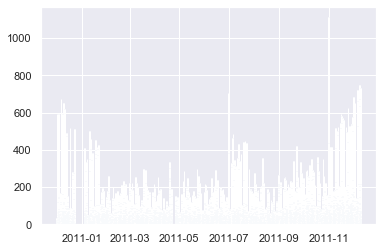

In [33]:
plt.clf()
counts = retail2['InvoiceDate'].value_counts(sort=True)
plt.bar(counts.index,counts)
plt.show()

In [34]:
retail.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,LineItemTotal,Returned
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12,22.00,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,20.34,NaN
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,2010,12,15.30,NaN
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,2010,12,25.50,NaN
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,2010,12,11.10,NaN
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,2010,12,11.10,NaN
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12,2010,12,54.08,NaN


Change formatting on the month-year column ***Might be better to move this higher 

In [35]:
retail['Year-Month']=retail['Year'].map(str)+'-'+retail['Month'].map(str)
retail['Year-Month']=pd.to_datetime(retail['Year-Month'],
                                    format='%Y-%m').dt.strftime('%Y-%m')


In [36]:
#determine the total, min and max for each year-month
totals = retail.groupby(['Year-Month']).agg({'UnitPrice':[sum,min,max]})
totals.columns = ["_".join(x) for x in totals.columns.ravel()]
totals

,UnitPrice_sum,UnitPrice_min,UnitPrice_max
Year-Month,,,
2010-12,260520.850,0.00,13541.33
2011-01,172752.800,0.00,16888.02
2011-02,127448.770,0.00,5575.28
2011-03,171486.510,0.00,5693.05
2011-04,129164.961,0.00,2382.92
2011-05,190685.460,0.00,8142.75
2011-06,200717.340,0.00,38970.00
2011-07,171906.791,0.00,6497.47
2011-08,150385.680,-11062.06,11062.06


It's worth noting that the majority of the month are not negative with the exception of August 2011. For August 2011 the min and max are the same value with one being positive and the other negative. This could indicate that there was a large purchase that was also returned this same month.

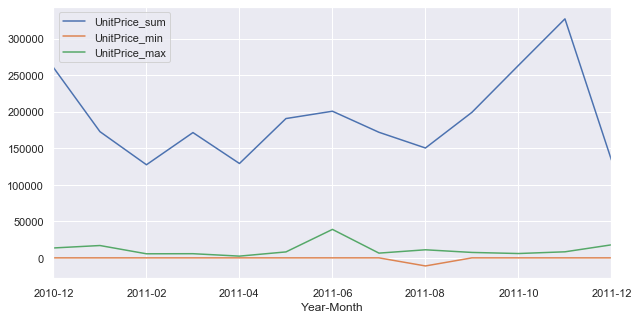

In [37]:
totals.plot(figsize=(10,5))

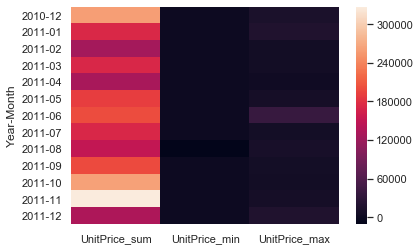

In [38]:
#a heatmap of the totals by month shows which months have a higher volume
sns.heatmap(totals)

The heatmap provides a quick visual of the volume for each month. November 2011 is the highest volumn month followed by October 2011 and December 2010. The high negative value for June 2011 is also highlighted since all of the other min/max values are the same color.

In [39]:
#Returns vs purchases
#Group by Invoice number 
#Avg invoice amount
#Avg number of items per invoice
#Avg number or invoices per customer - use this to narrow down who to recoomend to. 
    #i.e. must have ordered >5 times


In [40]:
#seperate out the returned vs. purchased
retail2_returned = retail2[retail2['Returned']=='-1']
retail2_purchased = retail2[retail2['Returned']=='0']

/anaconda3/envs/venv-3.6/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


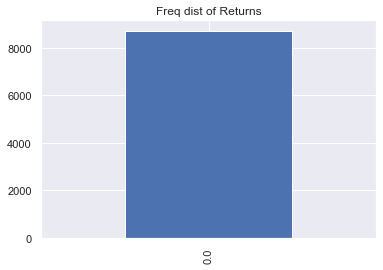

In [41]:
#compare the number of purchases and returns
retail2['Returned'].value_counts().plot.bar(title="Freq dist of Returns")

Determine if there is any correlation between the variables. 

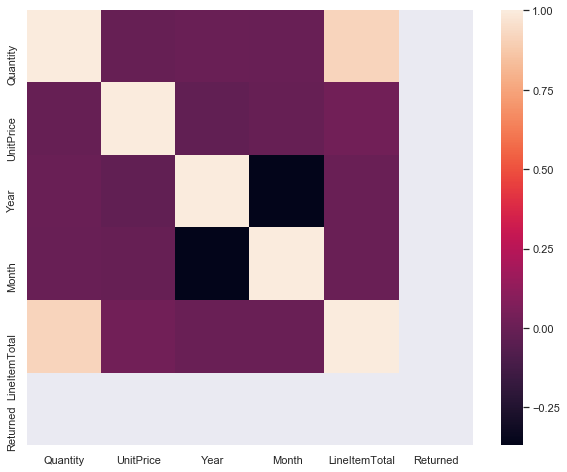

In [42]:
f, ax = plt.subplots(figsize=(10,8))
corr = retail2.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

Above we can see the correlation network for variables that have numeric values. Highly correlated variables would have a correlation value close to +1 and less correlated variables would have a correlation value close to -1. 
Based on the matrix we can see that there are not any variables are highly correlated other than LineItemTotal and Quantity. 

In [43]:
retail2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539120 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo        539120 non-null object
StockCode        539120 non-null object
Description      539120 non-null object
Quantity         539120 non-null int64
InvoiceDate      539120 non-null datetime64[ns]
UnitPrice        539120 non-null float64
CustomerID       539120 non-null object
Country          539120 non-null object
Year-Month       539120 non-null object
Year             539120 non-null int64
Month            539120 non-null int64
LineItemTotal    539120 non-null float64
Returned         8722 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 77.6+ MB


A pivot table is created based on country, customer and customer ID to show the quantity and unit price totals

In [44]:
retail_pivot = pd.pivot_table(retail, index=['Country','CustomerID'],
                             values=['Quantity','UnitPrice'],
                              aggfunc=[np.sum])
retail_pivot.head(20)

sum          
                     Quantity UnitPrice
Country   CustomerID                   
Australia 12386.0         354     23.91
          12388.0        1462    277.77
          12393.0         816    145.90
          12415.0       77242   2499.82
          12422.0         195     51.12
          12424.0         740     83.42
          12431.0        2393    718.08
          12434.0         373    198.13
          16321.0          78     56.60
Austria   12358.0         248    157.21
          12360.0        1165    457.91
          12370.0          51     64.70
          12373.0         197     64.15
          12374.0         342    139.25
          12414.0         300    154.26
          12429.0         198    114.33
          12453.0         473    102.91
          12817.0          53     48.29
          12818.0         923    101.77
          12865.0         877    296.74

New pivot table is created to show sum for each month

In [124]:
retail_pivot3 = pd.pivot_table(retail, index=['Year-Month'],
                             values=['LineItemTotal'],aggfunc=[np.sum])
retail_pivot3

,sum
,LineItemTotal
Year-Month,
2010-12,748957.020
2011-01,560000.260
2011-02,498062.650
2011-03,683267.080
2011-04,493207.121
2011-05,723333.510
2011-06,691123.120
2011-07,681300.111


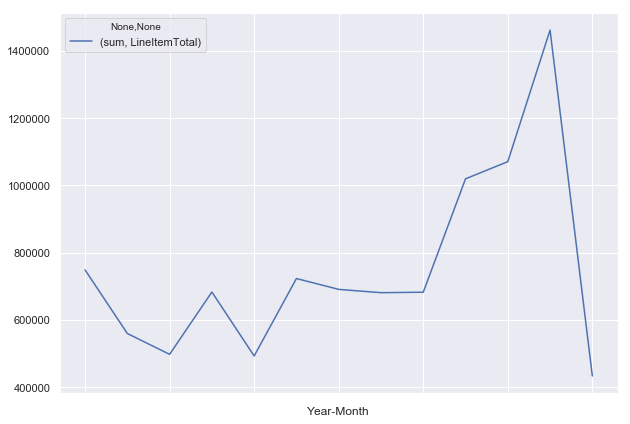

In [125]:
retail_pivot3.plot(figsize = (10,7))

The following is a heatmap based on the sum of the line item totals for each month. This is using the pivot table created from the dataset that contains the misc. items

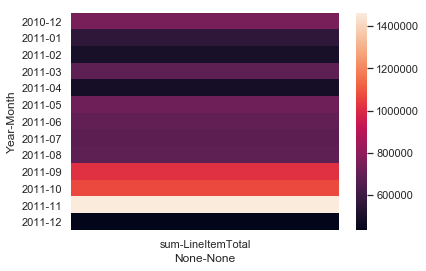

In [126]:
sns.heatmap(retail_pivot3)

In comparision, the following is the df without the misc. items

In [127]:
retail_pivot4 = pd.pivot_table(retail2, index=['Year-Month'],
                             values=['LineItemTotal'],aggfunc=[np.sum])
retail_pivot4

,sum
,LineItemTotal
Year-Month,
2010-12,760926.46
2011-01,580556.89
2011-02,500725.33
2011-03,681332.31
2011-04,483301.21
2011-05,732680.18
2011-06,725526.03
2011-07,678505.20


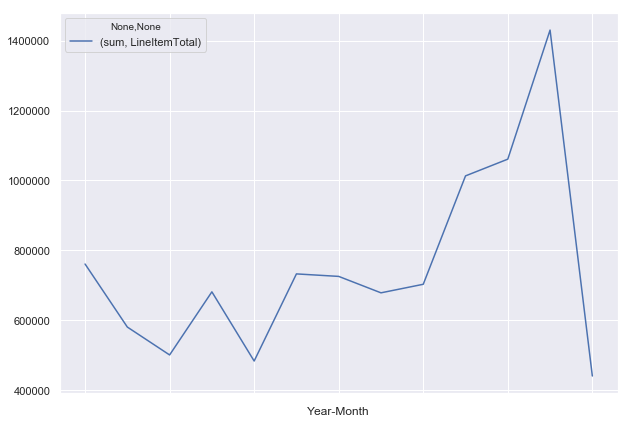

In [128]:
retail_pivot4.plot(figsize = (10,7))

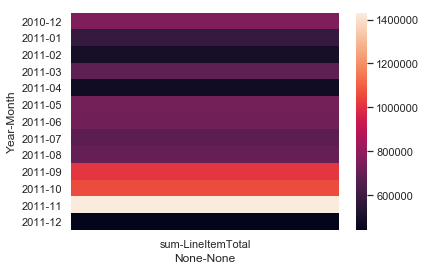

In [129]:
sns.heatmap(retail_pivot4)

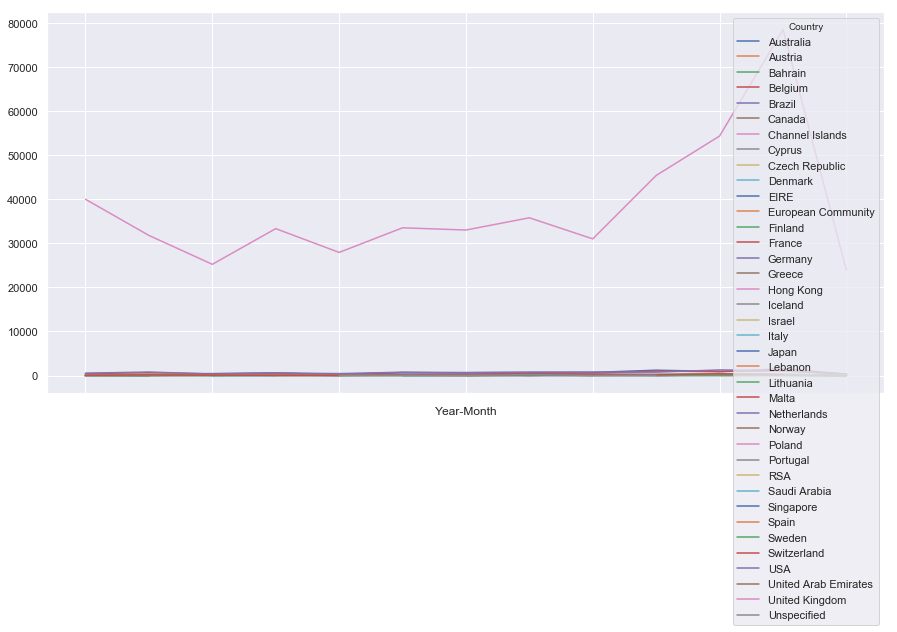

In [133]:
fig,ax = plt.subplots(figsize=(15,7))
retail2.groupby(['Year-Month','Country']).count()['CustomerID'].unstack().plot(ax=ax)

The previous plot shows that the UK has a significantly higher volume of orders over the other countries. This does make it harder to read the data on other countries.

In [139]:
#count of customer id's grouped by country
retail2.groupby(['Country']).count()['CustomerID']

Country
Australia                 1257
Austria                    387
Bahrain                     19
Belgium                   1971
Brazil                      32
Canada                     150
Channel Islands            756
Cyprus                     619
Czech Republic              28
Denmark                    375
EIRE                      8183
European Community          58
Finland                    653
France                    8236
Germany                   9096
Greece                     142
Hong Kong                  280
Iceland                    182
Israel                     297
Italy                      783
Japan                      355
Lebanon                     45
Lithuania                   35
Malta                      123
Netherlands               2330
Norway                    1060
Poland                     336
Portugal                  1475
RSA                         57
Saudi Arabia                10
Singapore                  215
Spain                     2468


The previous group by shows that other than the UK, which has 495,478 instances, the countries with the highest number of orders is EIRE, Germany and France.

In order to narrow down the dataset to determine the next market to focus on, a new DF for the next top countries is created

In [140]:
countries = ['EIRE','Germany','France']
top_retail=retail2[retail2.Country.isin(countries)]
top_retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25515 entries, 26 to 541908
Data columns (total 13 columns):
InvoiceNo        25515 non-null object
StockCode        25515 non-null object
Description      25515 non-null object
Quantity         25515 non-null int64
InvoiceDate      25515 non-null datetime64[ns]
UnitPrice        25515 non-null float64
CustomerID       25515 non-null object
Country          25515 non-null object
Year-Month       25515 non-null object
Year             25515 non-null int64
Month            25515 non-null int64
Returned         25515 non-null int64
LineItemTotal    25515 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 2.7+ MB


The following shows the number of orders each month by different customer IDs for each country

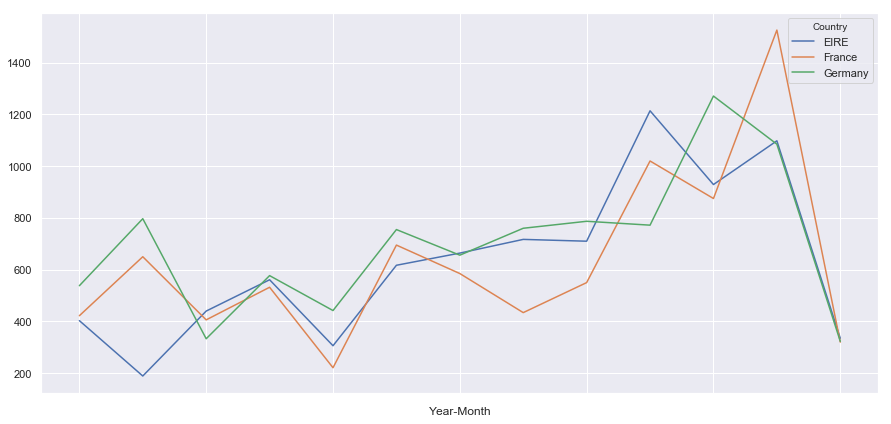

In [141]:
fig,ax = plt.subplots(figsize=(15,7))
top_retail.groupby(['Year-Month','Country']).count()['CustomerID'].unstack().plot(ax=ax)

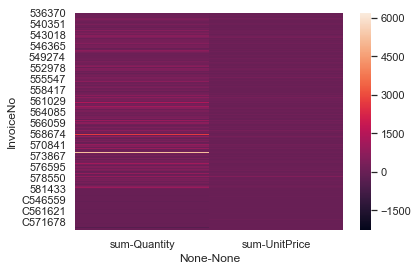

In [142]:
retail_pivot5 = pd.pivot_table(top_retail, index=['InvoiceNo'],
                             values=['Quantity','UnitPrice'],
                               aggfunc=[np.sum])
sns.heatmap(retail_pivot5)

The following heat map is created to show the difference betwen the different countries

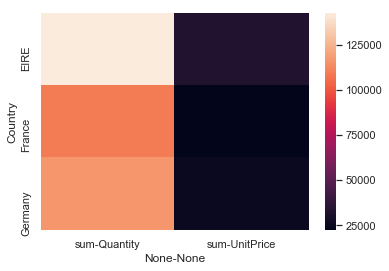

In [143]:
retail_pivot6 = pd.pivot_table(top_retail, index=['Country'],
                             values=['Quantity','UnitPrice'],
                               aggfunc=[np.sum])
sns.heatmap(retail_pivot6)

In [144]:
#df of the top retail countries grouped by invoice no, 
#country and year with the total of line item

top_retail_total = pd.DataFrame(top_retail.groupby(
    ['InvoiceNo','Country','Year-Month'])['LineItemTotal'].sum())
top_retail_total.head()

,,,LineItemTotal
InvoiceNo,Country,Year-Month,
536370,France,2010-12,801.86
536527,Germany,2010-12,243.48
536540,EIRE,2010-12,540.38
536541,EIRE,2010-12,15.00
536803,EIRE,2010-12,22.50


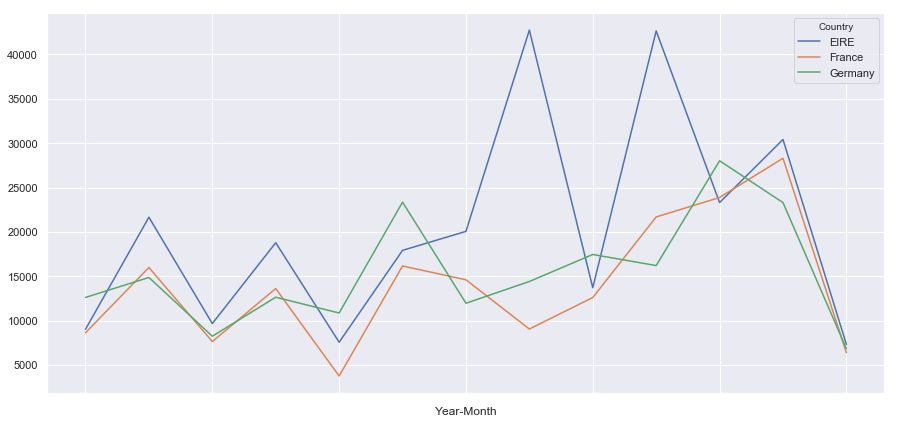

In [145]:
fig,ax = plt.subplots(figsize=(15,7))
top_retail_total.groupby(
    ['Year-Month','Country']).sum()['LineItemTotal'].unstack().plot(ax=ax)

Based on the previous chart, it shows that EIRE is the country with the next highest volume of orders and marketing could either focus on this to bring them to a similar volume as they have in the UK or on the other two countries to bring them up to a similar level as EIRE.

Identify the mean of line item totals and group them by country.

In [146]:
retail2['LineItemTotal'].groupby([retail2['Country']]).mean()

Country
Australia               108.981702
Austria                  22.476279
Bahrain                  28.863158
Belgium                  18.601197
Brazil                   35.737500
Canada                   20.769600
Channel Islands          26.569167
Cyprus                   20.890614
Czech Republic           23.990000
Denmark                  48.112373
EIRE                     32.364470
European Community       19.840517
Finland                  28.029923
France                   22.140528
Germany                  22.076561
Greece                   31.165634
Hong Kong                35.507286
Iceland                  23.681319
Israel                   26.625657
Italy                    19.510013
Japan                    99.774056
Lebanon                  37.641778
Lithuania                47.458857
Malta                    16.101382
Netherlands             121.665039
Norway                   30.465057
Poland                   20.396250
Portugal                 18.217980
RSA         

The previous grouping shows the avg line item total by country. This shows that Australia, Netherlands and Japan have the highest median line item total between all of the countries.

Determine the countries that spend the most based on the mean of order totals. In order to determine the total cost on each invoice along with the percentage of the order that line item is for, we group by invoice number and sum to line item totals and create new columns for the order total and percentage of order.

In [164]:
order_total = retail2.groupby('InvoiceNo')["LineItemTotal"].sum().rename("Order_Total").reset_index()
retail_1 = pd.DataFrame(retail2.merge(order_total)) #merge the order total into the df
#retail_1["Percent_of_Order"] = retail_1["LineItemTotal"]/retail_1["Order_Total"] #create percentage of order for each item
retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,Returned,LineItemTotal,Order_Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010,12,0,15.30,139.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,0,20.34,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010,12,0,22.00,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,0,20.34,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010,12,0,20.34,139.12


In [173]:
#add in value for the quantity of items on an order
order_qty = retail.groupby('InvoiceNo')["Quantity"].sum().rename("Order_Qty").reset_index()
retail_1 = pd.DataFrame(retail_1.merge(order_qty)) #merge the order total into the df
retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,Returned,LineItemTotal,Order_Total,Order_Qty
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,2010,12,0,25.50,139,40
1,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,2010,12,0,11.10,22,12
2,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom,2010-12,2010,12,0,31.80,278,83
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,2010-12,2010,12,0,14.85,70,15
4,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12,2010,12,0,17.85,17,3


If we focus on the order totals, having multiple rows in the df for the same invoice number will skew graphs and modeling and they should be removed.

In [175]:
#remove duplicates of the same invoice number
retail_1.drop_duplicates(subset='InvoiceNo',keep="last", inplace=True)
retail_1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year-Month,Year,Month,Returned,LineItemTotal,Order_Total,Order_Qty
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,2010-12,2010,12,0,25.50,139,40
1,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12,2010,12,0,11.10,22,12
2,536367,48187,DOORMAT NEW ENGLAND,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom,2010-12,2010,12,0,31.80,278,83
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,2010-12,2010,12,0,14.85,70,15
4,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12,2010,12,0,17.85,17,3


In [176]:
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 0 to 25315
Data columns (total 15 columns):
InvoiceNo        25316 non-null object
StockCode        25316 non-null object
Description      25316 non-null object
Quantity         25316 non-null int64
InvoiceDate      25316 non-null datetime64[ns]
UnitPrice        25316 non-null float64
CustomerID       25316 non-null object
Country          25316 non-null object
Year-Month       25316 non-null object
Year             25316 non-null int64
Month            25316 non-null int64
Returned         25316 non-null int64
LineItemTotal    25316 non-null float64
Order_Total      25316 non-null int64
Order_Qty        25316 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 3.1+ MB


In [177]:
#change order_total to int64
retail_1['Order_Total'] = retail_1['Order_Total'].astype('int64')
retail_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25316 entries, 0 to 25315
Data columns (total 15 columns):
InvoiceNo        25316 non-null object
StockCode        25316 non-null object
Description      25316 non-null object
Quantity         25316 non-null int64
InvoiceDate      25316 non-null datetime64[ns]
UnitPrice        25316 non-null float64
CustomerID       25316 non-null object
Country          25316 non-null object
Year-Month       25316 non-null object
Year             25316 non-null int64
Month            25316 non-null int64
Returned         25316 non-null int64
LineItemTotal    25316 non-null float64
Order_Total      25316 non-null int64
Order_Qty        25316 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 3.1+ MB


In [178]:
#view count of invoices for each country
retail_1['Country'].value_counts()

United Kingdom          23047
Germany                   578
France                    442
EIRE                      349
Belgium                   117
Spain                     100
Netherlands                97
Switzerland                68
Australia                  67
Portugal                   56
Italy                      49
Finland                    44
Sweden                     42
Norway                     34
Channel Islands            31
Japan                      25
Poland                     24
Denmark                    20
Austria                    19
Cyprus                     17
Unspecified                13
Israel                      9
Malta                       9
Hong Kong                   8
Iceland                     7
USA                         7
Canada                      5
Greece                      5
Lithuania                   4
Czech Republic              4
Bahrain                     4
Singapore                   4
European Community          4
United Ara

This information tells us where the high volume customer are. Knowing this can help drive marketing strategies. This information shows that the United Kingdom, Germany, and France are the ones that order the highest volume of items. However, based on previous assessments, even though these are the countries with the highest number or orders placed, they are not the countries that have the highest median cost of their orders.

In [185]:
############################# NOTE: ###############################
##############This migh need to be moved to a different location #######
#view median of invoice total by country
retail_1['Order_Total'].groupby([retail_1['Country']]).mean()

Country
Australia               2044.253731
Austria                  457.315789
Bahrain                  137.000000
Belgium                  313.008547
Brazil                  1143.000000
Canada                   622.600000
Channel Islands          647.677419
Cyprus                   760.294118
Czech Republic           168.000000
Denmark                  901.750000
EIRE                     758.587393
European Community       287.500000
Finland                  415.659091
France                   412.221719
Germany                  347.166090
Greece                   884.600000
Hong Kong               1242.375000
Iceland                  615.142857
Israel                   878.222222
Italy                    311.551020
Japan                   1416.680000
Lebanon                 1693.000000
Lithuania                415.250000
Malta                    220.222222
Netherlands             2922.030928
Norway                   949.441176
Poland                   285.250000
Portugal            

In [179]:
countries = ['Australia', 'Netherlands','Japan','Brazil','Lebanon']
top_5=retail_1[retail_1.Country.isin(countries)]
top_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 23 to 25172
Data columns (total 15 columns):
InvoiceNo        191 non-null object
StockCode        191 non-null object
Description      191 non-null object
Quantity         191 non-null int64
InvoiceDate      191 non-null datetime64[ns]
UnitPrice        191 non-null float64
CustomerID       191 non-null object
Country          191 non-null object
Year-Month       191 non-null object
Year             191 non-null int64
Month            191 non-null int64
Returned         191 non-null int64
LineItemTotal    191 non-null float64
Order_Total      191 non-null int64
Order_Qty        191 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 23.9+ KB


In [180]:
top_5['Country'].value_counts()

Netherlands    97
Australia      67
Japan          25
Lebanon         1
Brazil          1
Name: Country, dtype: int64

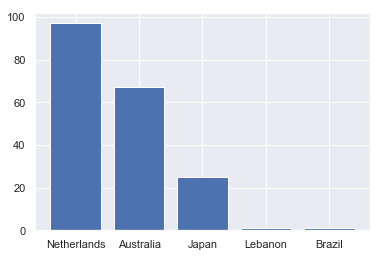

In [181]:
plt.clf()
counts = top_5['Country'].value_counts(sort=True)
plt.bar(counts.index,counts)
plt.show()

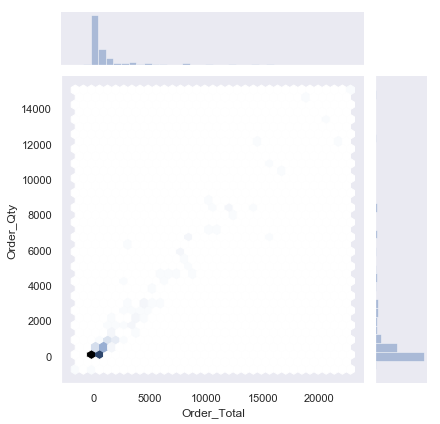

In [184]:
with sns.axes_style('dark'):
    sns.jointplot('Order_Total','Order_Qty', data=top_5, kind='hex')

The previous joint plot that was generated from order total and order quantity shows that most order totals and quantities are in the lower range and as the quantitiy increases so does the total.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


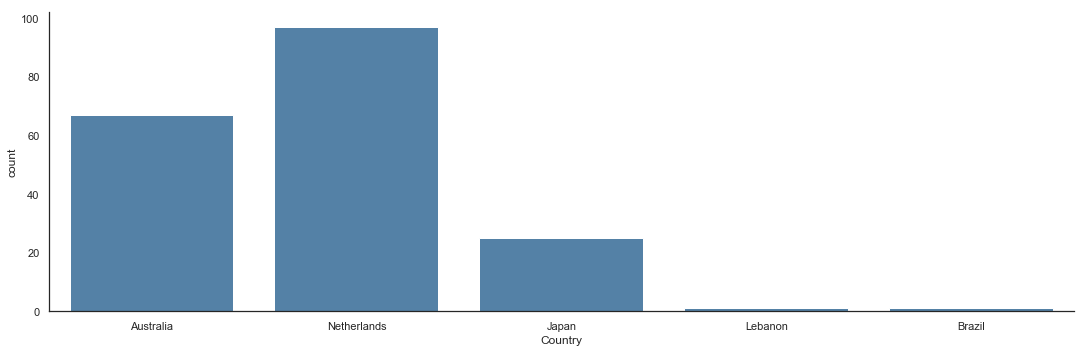

In [186]:
with sns.axes_style('white'):
    g=sns.factorplot("Country", data = top_5, aspect = 3,
                    kind="count",color = "steelblue")

The previous chart shows the count of orders per country. The Netherlands has the highest number of orders followed by Austrailia, then Japan. Lebanon and Brazil are the lowest.

/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


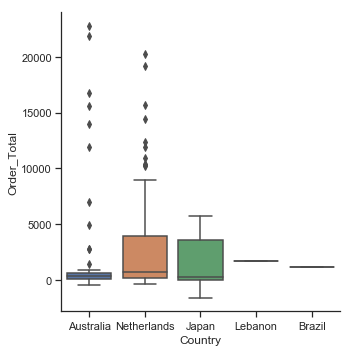

In [187]:
with sns.axes_style(style ='ticks'):
    g=sns.factorplot( "Country", "Order_Total", data = top_5, kind = "box")
    g.set_axis_labels("Country", "Order_Total")

The previous factor plot shows a boxplot for each country based on their order totals. Netherlands and Japan have a higher range than both Lebanon and Brazil. However, this can be an indication that Lebanon and Brazil are ordering in a more consistent price range than Japan, Netherlands, and Brazil.

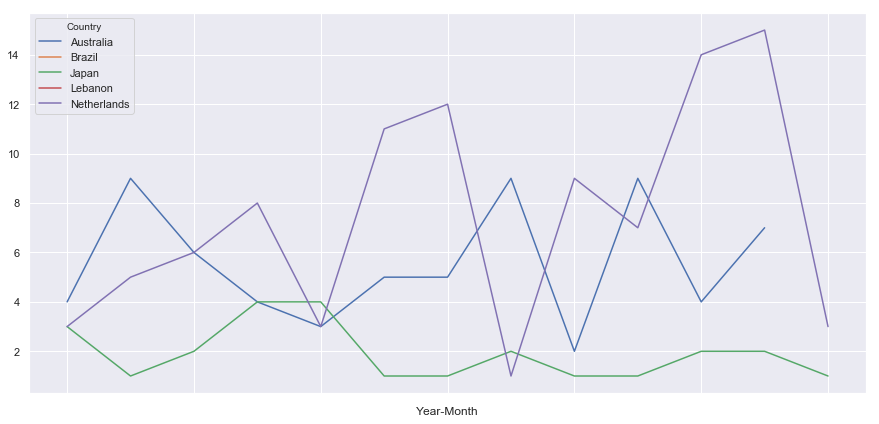

In [188]:
fig,ax = plt.subplots(figsize=(15,7))
top_5.groupby(['Year-Month','Country']).count()['CustomerID'].unstack().plot(ax=ax)

The chart above shows the number times that a particular customer ordered each month based on country

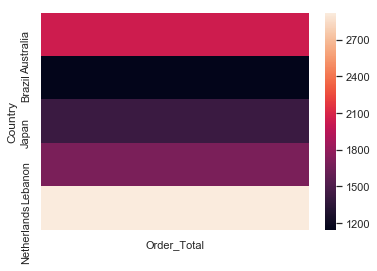

In [189]:
retail_pivot7 = pd.pivot_table(top_5, index=['Country'],
                             values=['Order_Total'])
sns.heatmap(retail_pivot7)

The prevoius heatmap shows the order total for the different countries. Netherlands had the highest followed by Australia.

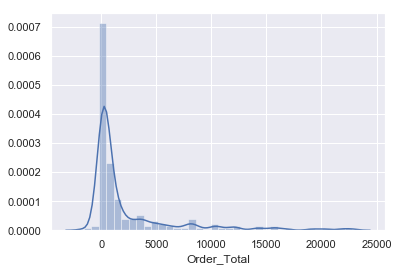

In [191]:
#distribution plot for order totals for the top 5 countries
sns.distplot(top_5['Order_Total'])


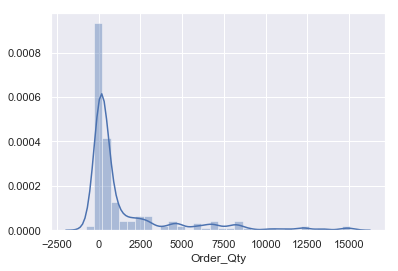

In [192]:
#distribution plot for order quantities for the top 5 countries
sns.distplot(top_5['Order_Qty'])

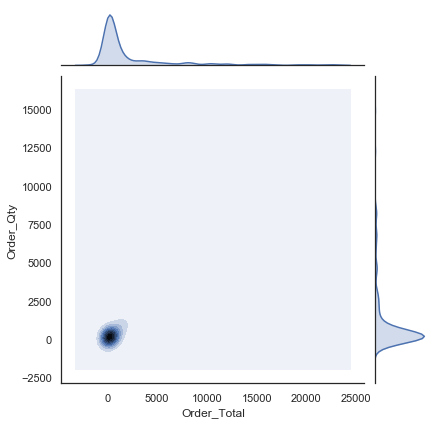

In [193]:
with sns.axes_style('white'):
    sns.jointplot("Order_Total", "Order_Qty", top_5, kind = 'kde')

The previous jointplot demonstrates where the highest intersection of order quantity and order total are.

## Linear Regression

A simple scatter plot of order qty and order total will determine if there is a linear relationship between the two.

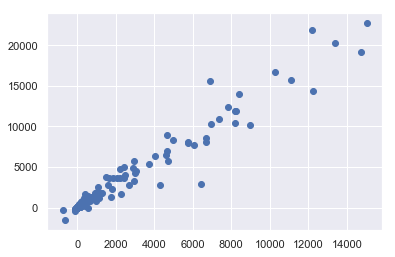

In [194]:
plt.scatter(top_5['Order_Qty'], top_5['Order_Total'])

The previous scatter plot validates that there is a linear relationship between order quantity and order total

A joint linear regression plot is created based on the quantity of items in an order and the price

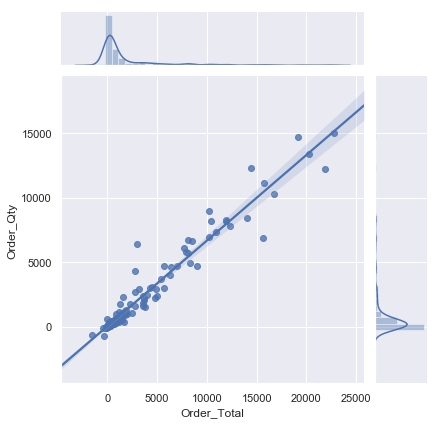

In [195]:
sns.jointplot("Order_Total","Order_Qty", data = top_5, kind = 'reg')

The regression plot shows that the majority of the order quantities are nominal with some high outliers

Simple Linear Regression with the Top 5 countries

In [196]:
#import the statsmodels library to perform linear regression
import statsmodels.formula.api as smf
model = smf.ols(formula = 'Order_Qty ~ Order_Total', data = top_5) #create model
results = model.fit() #fit model
print(results.summary()) #view summary of results

                            OLS Regression Results                            
Dep. Variable:              Order_Qty   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     3739.
Date:                Sun, 28 Jul 2019   Prob (F-statistic):          1.76e-126
Time:                        16:24:40   Log-Likelihood:                -1511.3
No. Observations:                 191   AIC:                             3027.
Df Residuals:                     189   BIC:                             3033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      27.4656     54.691      0.502      

In [197]:
print(results.params) #view just the coefficients of the results

Intercept      27.465551
Order_Total     0.663900
dtype: float64


In [198]:
print(results.conf_int()) #view the coonfidence interval of the results

                     0           1
Intercept   -80.416701  135.347803
Order_Total   0.642484    0.685316


linear regression with sklearn method

In [199]:
#import sklearn linear_model
from sklearn import linear_model
#create linear regression object
lr = linear_model.LinearRegression()
#specify predictor, x, and the response, y. 
predicted = lr.fit(X=top_5['Order_Total'].values.reshape(-1, 1), y = top_5['Order_Qty'])
print(predicted.coef_)

[0.66390006]


In [200]:
predicted.intercept_

27.46555092061203

Both linear regression methods, stats models and sklearn, had the same coeffiencts and intercept. What this shows us is that the quantity of items ordered in the model has an intercept at 21. This would indicate that there are about 21 items per order.

Another method to test linear regression is with kfolds. The following uses kfolds to perform linear regression and evaluate the model.

In [201]:
#import necessary libraries
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

In [202]:
#perform linear regression with k-fold method 
X=pd.DataFrame(top_5['Order_Total'])
y=pd.DataFrame(top_5['Order_Qty'])
model2 = LinearRegression()
scores = []
kfold = KFold(n_splits = 3, shuffle = True, random_state = 42)
for i, (train, test) in enumerate(kfold.split(X,y)):
    model2.fit(X.iloc[train,:], y.iloc[train,:])
    score = model2.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)
    print(scores) #view score of the model

[0.9668986747588033]
[0.9668986747588033, 0.9323834826942007]
[0.9668986747588033, 0.9323834826942007, 0.944307571716232]


Based on the scores of the k-fold method, the model had a high level of accuracy.

## Recommender System

In [45]:
retail2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539120 entries, 0 to 541908
Data columns (total 13 columns):
InvoiceNo        539120 non-null object
StockCode        539120 non-null object
Description      539120 non-null object
Quantity         539120 non-null int64
InvoiceDate      539120 non-null datetime64[ns]
UnitPrice        539120 non-null float64
CustomerID       539120 non-null object
Country          539120 non-null object
Year-Month       539120 non-null object
Year             539120 non-null int64
Month            539120 non-null int64
LineItemTotal    539120 non-null float64
Returned         8722 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 77.6+ MB


In [144]:
import turicreate as tc
import sklearn
from turicreate import SFrame

In [181]:
#subset just the CustomerID, StockCode

##################   NOTE   ###########################
####should also consider removing the returned items before doing this.

retail3=retail2[['CustomerID','StockCode']]
retail3.head()

,CustomerID,StockCode
0,17850.0,85123A
1,17850.0,71053
2,17850.0,84406B
3,17850.0,84029G
4,17850.0,84029E


In [182]:
#create data with user, item, and target field
#this will be used as an input for modeling
data=pd.melt(retail3.set_index('CustomerID')
['StockCode'].apply(pd.Series).reset_index(),
            id_vars=['CustomerID'],
            value_name='StockCode') \
            .groupby(['CustomerID','StockCode']) \
            .agg({'StockCode':'count'}) \
            .rename(columns={'StockCode':'Purchase_Count'})\
            .reset_index() 

In [193]:
data.head()

,CustomerID,StockCode,Purchase_Count
0,12346.0,23166,2
1,12347.0,16008,1
2,12347.0,17021,1
3,12347.0,20665,1
4,12347.0,20719,4


Create a dummy column to mark if a customer bought an item. If the item is purchased then the dummy column will have a 1. This method will help to normalize the data by purchase frequency across all users.

In [184]:
def create_data_dummy(data):
    data_dummy = data.copy()
    data_dummy['purchase_dummy'] = 1
    return data_dummy

data_dummy = create_data_dummy(data)

In [185]:
#normalize data by creating a user-item matrix
#the following Steps will normalize purchase history, from 0-1
#1 being the most number of puchase and 0 being 0 purchases

df_matrix = pd.pivot_table(data, values='Purchase_Count',
                          index='CustomerID', columns='StockCode')
df_matrix.head()

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,DCGS0069,DCGS0070,DCGS0071,DCGS0072,DCGS0073,DCGS0074,DCGS0076,DCGSSBOY,DCGSSGIRL,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
df_matrix_norm = (df_matrix-df_matrix.min())/(df_matrix.max()-df_matrix.min())
df_matrix_norm.head()

StockCode,10002,10080,10120,10125,10133,10134,10135,11001,15030,15034,...,DCGS0069,DCGS0070,DCGS0071,DCGS0072,DCGS0073,DCGS0074,DCGS0076,DCGSSBOY,DCGSSGIRL,m
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df_matrix.shape

(4364, 4056)

In [192]:
#create table for input to modeling

d=df_matrix_norm.reset_index()
d.index.names = ['Scaled_Purchase_Freq']
data_norm = pd.melt(d,id_vars=['CustomerID'],
                   value_name='Scaled_Purchase_Freq').dropna()
print(data_norm.shape)
data_norm.head(10)

(269141, 3)


,CustomerID,StockCode,Scaled_Purchase_Freq
86,12451.0,10002,0.000000
130,12510.0,10002,0.000000
189,12583.0,10002,0.000000
236,12637.0,10002,0.000000
268,12673.0,10002,0.000000
274,12681.0,10002,0.000000
275,12682.0,10002,0.043478
316,12731.0,10002,0.086957
328,12748.0,10002,0.000000
333,12754.0,10002,0.000000


In [189]:
#Split train and test set
def split_data(data):
    '''
    Splits dataset into training and test set.
    
    Args:
        data (pandas.DataFrame)
        
    Returns
        train_data (tc.SFrame)
        test_data (tc.SFrame)
    '''
    train, test = train_test_split(data, test_size = .2)
    train_data = tc.SFrame(train)
    test_data = tc.SFrame(test)
    return train_data, test_data


In [190]:
train_data, test_data = split_data(data)

TypeError: sequence item 0: expected str instance, bytes found

In [194]:
data.head()

,CustomerID,StockCode,Purchase_Count
0,12346.0,23166,2
1,12347.0,16008,1
2,12347.0,17021,1
3,12347.0,20665,1
4,12347.0,20719,4


## Train and Test Datasets

In [69]:
#import libraries
from sklearn.model_selection import train_test_split

In [209]:
############### Note: this was the original dataset ####################
#split with an 80/20 ratio
retail_train, retail_test = train_test_split(retail2,
                                            test_size=0.20,
                                            random_state=42)
print('# items on Train set: %d' % len(retail_train))
print('# items on Test set: %d' % len(retail_test))

# items on Train set: 431296
# items on Test set: 107824


In [175]:
train_p_sf=tc.SFrame(train_p)

TypeError: sequence item 0: expected str instance, bytes found

In [195]:
#split purchase Data (data) with an 80/20 ratio
train_p, test_p = train_test_split(data,
                                            test_size=0.20,
                                            random_state=42)
print('# items on Train set: %d' % len(train_p))
print('# items on Test set: %d' % len(test_p))

# items on Train set: 216575
# items on Test set: 54144


In [196]:
#split dummy variable Data (data_dummy) with an 80/20 ratio
train_d, test_d = train_test_split(data_dummy,
                                            test_size=0.20,
                                            random_state=42)
print('# items on Train set: %d' % len(train_d))
print('# items on Test set: %d' % len(test_d))

# items on Train set: 216575
# items on Test set: 54144


In [197]:
#split normalized Data (data) with an 80/20 ratio
train_n, test_n = train_test_split(data_norm,
                                            test_size=0.20,
                                            random_state=42)
print('# items on Train set: %d' % len(train_n))
print('# items on Test set: %d' % len(test_n))

# items on Train set: 215312
# items on Test set: 53829


## Define Models

In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270719 entries, 0 to 270718
Data columns (total 3 columns):
CustomerID        270719 non-null object
StockCode         270719 non-null object
Purchase_Count    270719 non-null int64
dtypes: int64(1), object(2)
memory usage: 6.2+ MB


In [199]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270719 entries, 0 to 270718
Data columns (total 4 columns):
CustomerID        270719 non-null object
StockCode         270719 non-null object
Purchase_Count    270719 non-null int64
purchase_dummy    270719 non-null int64
dtypes: int64(2), object(2)
memory usage: 8.3+ MB


In [200]:
data_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269141 entries, 86 to 17621831
Data columns (total 3 columns):
CustomerID              269141 non-null object
StockCode               269141 non-null object
Scaled_Purchase_Freq    269141 non-null float64
dtypes: float64(1), object(2)
memory usage: 8.2+ MB


In [201]:
#define field names for constant variables in models

user_id = 'CustomerID'
item_id = 'StockCode'
users_to_recommend = list('CustomerId')
n_rec = 10 #number of items to recommend
n_display = 30 #display the first few rows in an output

In [202]:
#define the function for the models

def model(train_data, name, item_id, target,
         users_to_recommend, n_rec, n_display):
    if name == 'popularity':
        model = tc.popularity_recommender.create(train_data,
                                                user_id=user_id,
                                                item_id=item_id,
                                                target=target)
        if name =='cosine':
            model = tc.item_similarity_recommender.create(train_data,
                                                         user_id=user_id,
                                                         item_id=item_id,
                                                         target=target,
                                    similarity_type='cosine')
        if name == 'pearson':
            model = tc.item_similarity_recommender.create(train_data,
                                                         user_id=user_id,
                                                         item_id=item_id,
                                                         target=target,
                                    similarity_type='pearson')
            recom = model.recommend(users=users_to_recommend, k=n_rec)
            recom.print_rows(n_display)
            return model

## Build Popularity Model as Baseline

A popularity model will recommend the most popular items based on the products with the highest number of sales from all customers

In [203]:
#using purchase count
name = 'popularity'
target = 'Purchase_Count'
popularity = model(train_p, 
                   user_id, 
                   item_id, 
                   target, 
                   users_to_recommend, 
                   n_rec, 
                   n_display)

In [204]:
#using purchase dummy count
name = 'popularity'
target = 'purchase_dummy'
pop_dummy = model(train_d, 
                   user_id, 
                   item_id, 
                   target, 
                   users_to_recommend, 
                   n_rec, 
                   n_display)

In [205]:
#using normalized purchase count
name = 'popularity'
target = 'Scaled_Purchase_Freq'
pop_norm = model(train_n, 
                   user_id, 
                   item_id, 
                   target, 
                   users_to_recommend, 
                   n_rec, 
                   n_display)

The following groups the items based on the most sold items and averages them among all customers. 

In [206]:
train_p.groupby(by=item_id)['Purchase_Count'].mean().sort_values(ascending=False)

StockCode
47566b     102.000000
84923       98.000000
15056n      84.000000
72349b      82.000000
84997b      70.000000
84509a      68.000000
85123a      67.000000
84970s      66.000000
84997c      66.000000
84997a      65.000000
15056bl     62.000000
82494l      61.000000
85131B      57.333333
47591d      56.000000
85049g      51.000000
84970l      50.000000
72801d      44.000000
85049e      42.000000
84510a      40.000000
85049a      36.000000
85114c      35.000000
85131D      34.333333
90115       31.000000
90013B      31.000000
20734       30.000000
85039a      29.000000
47559b      28.000000
82001s      27.000000
84509c      27.000000
21082       26.000000
              ...    
35832        1.000000
90146        1.000000
21348        1.000000
72814        1.000000
90162A       1.000000
21333        1.000000
84031b       1.000000
21331        1.000000
21330        1.000000
82545A       1.000000
90154        1.000000
79323GR      1.000000
72819        1.000000
79323LP      1.000000


## Collaborative Filtering Model

In this model, items are recommended based on how similar users purchased itms. 

### Cosine Similarity

Cosine similarity is the angle between the two vectors of the items. The closer the vectors, the smaller the angle and the larger the cosine.

In [207]:
#using purchase count
name='cosine'
target = 'Purchase_Count'
cos = model(train_p, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)

In [208]:
#using purchase dummy
name='cosine'
target = 'purchase_dummy'
cos_dummy = model(train_d, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)

In [209]:
#using normalized data
name='cosine'
target = 'Scaled_Purchase_Freq'
cos_norm = model(train_n, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)

### Pearson Similarity

Similarity is the pearson coefficient between two vectors.

In [210]:
#using purchase count
name='pearson'
target = 'Purchase_Count'
pear = model(train_p, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)

In [211]:
#using purchase dummy
name='pearson'
target = 'purchase_dummy'
pear_dummy = model(train_d, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)

In [212]:
#using normalized data
name='pearson'
target = 'Scaled_Purchase_Freq'
pear_norm = model(train_n, user_id, item_id, target,
           users_to_recommend, n_rec,n_display)


In [215]:
print(pear_norm)

None


## Model Evaluation

In [213]:
#create inital callable variables for model evaluation

models_w_counts = [popularity, cos, pear]
models_w_dummy = [pop_dummy, cos_dummy, pear_dummy]
models_w_norm = [pop_norm, cos_norm, pear_norm]
names_w_counts = ['Popularity Model on Purchase Counts', 
                  'Cosine Similarity on Purchase Counts', 
                  'Pearson Similarity on Purchase Counts']
names_w_dummy = ['Popularity Model on Purchase Dummy', 
                 'Cosine Similarity on Purchase Dummy', 
                 'Pearson Similarity on Purchase Dummy']
names_w_norm = ['Popularity Model on Scaled Purchase Counts', 
                'Cosine Similarity on Scaled Purchase Counts', 
                'Pearson Similarity on Scaled Purchase Counts']

Compare models based on RMSE and Precision-Recall 

In [214]:
eval_counts = tc.recommender.util.compare_models(test_p, models_w_counts, model_names=names_w_counts)
eval_dummy = tc.recommender.util.compare_models(test_d, models_w_dummy, model_names=names_w_dummy)
eval_norm = tc.recommender.util.compare_models(test_n, models_w_norm, model_names=names_w_norm)

PROGRESS: Evaluate model Popularity Model on Purchase Counts


AttributeError: 'NoneType' object has no attribute 'evaluate'

#  Surprise Package

In [216]:
data.head()

,CustomerID,StockCode,Purchase_Count
0,12346.0,23166,2
1,12347.0,16008,1
2,12347.0,17021,1
3,12347.0,20665,1
4,12347.0,20719,4


In [277]:
##Note: Run the following command in conda to install Surprise package
#conda install -c conda-forge scikit-surprise


#import surprise packages
import surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import KNNWithZScore
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from collections import defaultdict

In [234]:
#determine range for purchase count to input into Reader
lower = data['Purchase_Count'].min()
upper = data['Purchase_Count'].max()
print('Purchase range: {0} to {1}'.format(lower, upper))

Purchase range: 1 to 497


In [240]:

reader = surprise.Reader(rating_scale = (1,497))
sp_data = surprise.Dataset.load_from_df(data,reader)

In [262]:
#create benchmark using RMSE as the accuracy metric for the predictions 
#This is used to determine which algorithm would give us the best results
benchmark = []
#iterate for all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(),
                  KNNBasic(), KNNWithMeans(),KNNWithZScore(),BaselineOnly(),CoClustering()]:
    #Perform Cross Validation
    results = cross_validate(algorithm, sp_data, measures=['RMSE'],cv=3, verbose = False)
    
    #Get results and add algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]],
                              index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithZScore,5.593125,1.882151,14.424428
KNNWithMeans,5.680061,1.731250,13.703180
KNNBaseline,5.770286,2.198215,15.316304
BaselineOnly,5.805518,0.594922,0.729565
NMF,6.323827,10.425164,0.693754
CoClustering,6.546970,3.617542,0.766395
KNNBasic,7.104077,1.626631,12.861899
SlopeOne,8.079217,2.079953,10.255592
NormalPredictor,8.668084,0.259706,0.624365


Based on the results of the previous benchmark chart, the KNNWithZScore gave us the best RSME with a value of 5.593125 so we will use this algorithm to train and predict with.

In [265]:
#create random trainset and test set with 80/20 ratio
trainset, testset = train_test_split(sp_data, test_size = .20)

In [286]:
#define cross-validation iterator
kf=KFold(n_splits = 3)

#apply the KNNWithZScore algorithm
algk=KNNWithZScore()

for trainset, testset in kf.split(sp_data):
    #train the algorithm on the train set and predict purchases for the testset
    algk.fit(trainset)
    k_predictions = algk.test(testset)

#compute RMSE
accuracy.rmse(k_predictions, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 6.2417


6.241705951761958

In [287]:
#run 3-fold cross-validation and print results
cross_validate(algk, sp_data, measures=['RMSE','MAE'], cv=3, verbose = True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithZScore on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    5.2712  6.1065  5.2028  5.5268  0.4108  
MAE (testset)     1.0083  1.0485  0.9949  1.0173  0.0228  
Fit time          2.09    1.92    1.99    2.00    0.07    
Test time         14.89   14.86   14.41   14.72   0.22    


{'test_rmse': array([5.27121201, 6.1064682 , 5.20275674]),
 'test_mae': array([1.00834518, 1.04849275, 0.99493064]),
 'fit_time': (2.090818166732788, 1.9237098693847656, 1.9918451309204102),
 'test_time': (14.88630986213684, 14.862462997436523, 14.405153036117554)}

In [288]:
#tune algorithm parameters
param_grid = {'n_epochs':[5,10], 'lr_all':[0.002,0.005], 'reg_all':[0.4,0.6]}
gs = GridSearchCV(KNNWithZScore, param_grid,measures=['rmse','mae'],cv=3)
gs.fit(sp_data)

#best RMSE score
print(gs.best_score['rmse'])

#combination of parameters that give the best RMSE score
print(gs.best_params['rmse'])

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [289]:
#use the algorithm that yields the best rmse
algk1 = gs.best_estimator['rmse']
algk1.fit(sp_data.build_full_trainset())

Computing the msd similarity matrix...
Done computing similarity matrix.


## Top 5 Recommendations - KNN With Z Score 

In [290]:
def get_top_n(k_predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for CustomerID, StockCode, true_r, est, _ in k_predictions:
        top_n[CustomerID].append((StockCode, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for CustomerID, Purchase_Count in top_n.items():
        Purchase_Count.sort(key=lambda x: x[1], reverse=True)
        top_n[CustomerID] = Purchase_Count[:n]

    return top_n

In [291]:
#slightly different from above, predict ratings for pairs that are NOT in the training set
testset_k = trainset.build_anti_testset()
pred = algk.test(testset_k)

top_n = get_top_n(k_predictions, n=5)

#print recommended items for each user
for CustomerID, Purchase_Count in top_n.items():
    print(CustomerID, [StockCode for (StockCode,_) in Purchase_Count])

17965.0 [79321, 23084, 22193, 23300, 47566]
15159.0 [22656, 22727, 79321, 23202, 84947]
12477.0 [21669, 84347, 22467, '85099B', 22212]
14639.0 [21668, 84879, 21314, 21673, 23085]
18265.0 [22423, 20914, 47566, 82484, 22424]
17911.0 [21914, 21136, 22187, 23695, 23353]
14539.0 [22154, 21914, 22144, 35970, 23176]
14307.0 [21733, 21705, 22464, 21833, '84970L']
17841.0 [84816, 21258, 22731, 22659, 23159]
17348.0 [20723, '85040A', 22505, 22968, 20986]
12940.0 [47566, 22423, '85034A', 84792, 23245]
14911.0 ['47348A', 20984, 22699, 21258, 20728]
14577.0 [21034, 22113, 21931, 22834, 20712]
15704.0 [21034, 23203, 22171, 21754, 23301]
17706.0 [23084, 22771, 21535, 21172, 21174]
15292.0 [22139, 21609, 10135, 22607, 21619]
13901.0 [22891, 84632, 20971, 22741, 22867]
14733.0 [82483, '82494L', 21175, '85123A', 82482]
12453.0 [22077, 22961, 22139, 20718, 21498]
14345.0 ['84030E', 21481, 21001, 22111, 21200]
13954.0 [22847, 22144, 22061, 22569, 22441]
15472.0 [22386, 22077, 23203, 22575, '85199S']
14961

15738.0 [20914, 21210, 21080, 20677, 22090]
13016.0 [22993, 22722, 22077, 22961, 23294]
15624.0 [22470, 21626, 23321, 22269, 22287]
14462.0 [22178, 82483, 47566, 22607, 21908]
17734.0 [48194, 84945, 21912, 22816, 23241]
14578.0 [23355, 22312, 22314, 22113, 22114]
16809.0 [23206, 22383, 22386, '48173C', '85099B']
18232.0 [22771, 23085, 22469, 22149, 22668]
17974.0 [22328, 22326, 22429, 71477, 21703]
14954.0 [22371, 23202, 20828, '85099B', 22423]
14598.0 ['85231B', 22661, 21918, 22302, 22909]
15674.0 [47566, 84817, 22722, 22720, 23203]
16203.0 [22086, 22729, 22264, 22966, 22960]
17507.0 [21843, 21172, 22776, 85150, 22722]
14226.0 [84879, 22847, 23167, 23165, 23439]
13263.0 [22252, 21908, 22227, 21745, 22423]
15489.0 [22900, 71477, 22637, 22362, 21175]
13828.0 [20727, 21559, 20982, 22609, 22610]
16774.0 [22867, 23323, 21447, 21189, 22594]
13316.0 [22568, 23275, 22993, 22570, 22273]
17062.0 [22197, 21730, 21975, 85062, 22925]
15630.0 ['85123A', 22423, '84279P', 22418, 21787]
15502.0 [22197

16448.0 ['85123A', 22804, 22798, 21380, '85131A']
13711.0 ['85123A', 22062]
15918.0 [22175, 22212, 22352, 22318, 22284]
13441.0 [23130, 22579, 23272]
12414.0 [47566, 21172, 22551, 22556, 17003]
13188.0 [23444]
17763.0 ['75049L']
12999.0 [22027, 22433, 21790, 22522, 22150]
17666.0 [22423, 71459, 23332]
12769.0 [21181, '15056N', 22488, 20679, '84971S']
18099.0 [21064, 22556]
17707.0 [84946, 79000]
13955.0 [22470, 84828, 21733, 20832, 71459]
18141.0 [22457]
12559.0 [22423, 22636, 22908, 22302, 22494]
15973.0 [21428, 21870]
12690.0 [23084, 22699, 23206, 21936, 23108]
15565.0 [21166]
17896.0 [84947, 22792]
17816.0 [23203, 22962, 16015, 16014, 21311]
13045.0 [23203, 84945, 23199, 22964, 84946]
15717.0 [47566, '84970L']
17670.0 [21224, 22550]
14238.0 [22402, 22435]
17351.0 [22570, 48138, 20685, '15058A', 22748]
15754.0 [20969, 20970, 22079, 23519]
15749.0 [48185]
16715.0 [23058, 35923, 35933, 23434]
17639.0 [21034, 22796, 21671, 22168]
13618.0 [84879, 22268, 85212, 21933]
16850.0 [82600, 2280

In [296]:
#determine best and worst predictions from the KNN model

def get_Iu(CustomerID):
    """ return the number of items purchased by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items purchased by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(CustomerID)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(StockCode):
    """ return number of users that have purchased given item
    args:
      StockCode: the raw id of the item
    returns:
      the number of users that have purchased the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(StockCode)])
    except ValueError:
        return 0
    
bw_df = pd.DataFrame(k_predictions, columns=['CustomerID', 'StockCode', 'rui', 'est', 'details'])
bw_df['CustomerId'] = bw_df.CustomerID.apply(get_Iu)
bw_df['StockCode'] = bw_df.StockCode.apply(get_Ui)
bw_df['err'] = abs(bw_df.est - bw_df.rui)
best_predictions = bw_df.sort_values(by='err')[:10]
worst_predictions = bw_df.sort_values(by='err')[-10:]

In [305]:
from collections import OrderedDict

In [310]:
k_results = pd.DataFrame(k_predictions)
k_results.sort_values(['est'], ascending = False)
k_results.head()

,uid,iid,r_ui,est,details
0,17965.0,21464,1.0,1.045195,"{'actual_k': 39, 'was_impossible': False}"
1,15159.0,23050,1.0,2.240482,"{'actual_k': 40, 'was_impossible': False}"
2,12477.0,21094,1.0,1.577940,"{'actual_k': 40, 'was_impossible': False}"
3,14639.0,22068,1.0,1.132527,"{'actual_k': 33, 'was_impossible': False}"
4,18265.0,48138,1.0,1.000000,"{'actual_k': 40, 'was_impossible': False}"


In [314]:
for uid, purchase_count in top_n.items():
    print(uid, [iid for (iid, _) in purchase_count])

17965.0 [79321, 23084, 22193, 23300, 47566]
15159.0 [22656, 22727, 79321, 23202, 84947]
12477.0 [21669, 84347, 22467, '85099B', 22212]
14639.0 [21668, 84879, 21314, 21673, 23085]
18265.0 [22423, 20914, 47566, 82484, 22424]
17911.0 [21914, 21136, 22187, 23695, 23353]
14539.0 [22154, 21914, 22144, 35970, 23176]
14307.0 [21733, 21705, 22464, 21833, '84970L']
17841.0 [84816, 21258, 22731, 22659, 23159]
17348.0 [20723, '85040A', 22505, 22968, 20986]
12940.0 [47566, 22423, '85034A', 84792, 23245]
14911.0 ['47348A', 20984, 22699, 21258, 20728]
14577.0 [21034, 22113, 21931, 22834, 20712]
15704.0 [21034, 23203, 22171, 21754, 23301]
17706.0 [23084, 22771, 21535, 21172, 21174]
15292.0 [22139, 21609, 10135, 22607, 21619]
13901.0 [22891, 84632, 20971, 22741, 22867]
14733.0 [82483, '82494L', 21175, '85123A', 82482]
12453.0 [22077, 22961, 22139, 20718, 21498]
14345.0 ['84030E', 21481, 21001, 22111, 21200]
13954.0 [22847, 22144, 22061, 22569, 22441]
15472.0 [22386, 22077, 23203, 22575, '85199S']
14961

13958.0 [21527, 85066, '72799E']
14116.0 [22728, 22766, 22349, 22147, 22554]
17584.0 [82484, 22212, 84687, 22677, 21770]
13736.0 [23300, 22059, 23184, 22355, 85152]
13732.0 [21912, '84926D', 22138, '85034B', 23247]
15272.0 [22649, 22720, 84674, 22693, 22844]
12758.0 [20652, 23204, 23178, 82583, 20658]
15456.0 [22178, 22055, 37446, 21832, 21175]
15623.0 [23298, 21773, 48188, 23013, 22768]
16249.0 [84879, 21391, 22208, 21212, 23322]
16081.0 [37450, 82483, '82494L', 84879, '85123A']
14326.0 [84946, '72807B']
13851.0 [20972, 23148, 84991, 23330, 22960]
12381.0 [22139, 22179, 22423, 22898, 21912]
17832.0 [22138, 22066, 21401, 22617, 21619]
14261.0 [23284, 85066, 22960, 22383, 21671]
17037.0 [22720, 23203, 22662, 22193, 22960]
14662.0 [21557, 22900, 22780, 21731, 22384]
12849.0 [22998, 22114, 22997, 22231, 85174]
17371.0 ['90125D', 21735, 22423, 22383, 22467]
14522.0 [22457, '46000M', 23393, 23399, 22440]
14022.0 ['85123A', 85150, 21166, 22189, 21915]
13203.0 [22178, 23197, 23155, 21365, 228

16416.0 [22197, 82486, 84978, 23328, 20727]
14885.0 [21080, 22909, 23311, 22142, 22950]
15223.0 [22423, 21931, 21212, 22960, 22722]
14124.0 [21641, 21382, 16045]
12401.0 [22423]
15344.0 [22423, 82486, 23243, 21340, 23245]
17120.0 ['85123A', 22384, 20728, 22801]
16356.0 [22457, 82600, 21905, 82578, 21908]
13525.0 [23395, '72801C']
12919.0 [22457, 22077, 22470, 21259, 22652]
15677.0 [15036, 21232, 23313, 84832, 23493]
14046.0 [72232, 17001, 17096, '85230E', '17084J']
14411.0 [22849, 22840, 84375]
18213.0 [21169, 23077, 84755, 22646, 22711]
15342.0 [22412, 22902, 22554, '85071A', 22529]
14628.0 ['85123A', 22457, 23355, 21381, 22966]
12913.0 ['85099B', 23202, 21810, 23127, 22154]
13223.0 [21889, 21892, '84508A']
15883.0 [21109, 20676, 21154, 22776, 22897]
15105.0 [22457, 22569, 20972, 22149, 22568]
13973.0 [22487, 22961, '85099F']
13666.0 [47566, 22659, '47590A', 22090, 22942]
17045.0 [22112, 22835, 21213, 20941]
14619.0 [22197, 23155, 22768, 22697, 22189]
14439.0 [22697, 22720, 22469, 228

In [297]:
bw_df.head()

,CustomerID,StockCode,rui,est,details,CustomerId,err
0,17965.0,40,1.0,1.045195,"{'actual_k': 39, 'was_impossible': False}",197,0.045195
1,15159.0,74,1.0,2.240482,"{'actual_k': 40, 'was_impossible': False}",240,1.240482
2,12477.0,109,1.0,1.577940,"{'actual_k': 40, 'was_impossible': False}",118,0.577940
3,14639.0,37,1.0,1.132527,"{'actual_k': 33, 'was_impossible': False}",85,0.132527
4,18265.0,201,1.0,1.000000,"{'actual_k': 40, 'was_impossible': False}",28,0.000000


In [298]:
best_predictions = bw_df.sort_values(by='err')[:10]
worst_predictions = bw_df.sort_values(by='err')[-10:]

In [299]:
#View top predictions
best_predictions

,CustomerID,StockCode,rui,est,details,CustomerId,err
61191,15576.0,50,1.0,1.0,"{'actual_k': 37, 'was_impossible': False}",26,0.0
50811,15786.0,56,1.0,1.0,"{'actual_k': 40, 'was_impossible': False}",168,0.0
75704,13594.0,150,1.0,1.0,"{'actual_k': 40, 'was_impossible': False}",17,0.0
21645,12734.0,31,1.0,1.0,"{'actual_k': 22, 'was_impossible': False}",2,0.0
75698,16932.0,17,1.0,1.0,"{'actual_k': 13, 'was_impossible': False}",29,0.0
50832,17350.0,20,1.0,1.0,"{'actual_k': 16, 'was_impossible': False}",40,0.0
75675,18151.0,127,1.0,1.0,"{'actual_k': 40, 'was_impossible': False}",28,0.0
75666,16574.0,37,1.0,1.0,"{'actual_k': 27, 'was_impossible': False}",14,0.0
21655,15089.0,97,1.0,1.0,"{'actual_k': 40, 'was_impossible': False}",98,0.0
8116,15132.0,16,1.0,1.0,"{'actual_k': 15, 'was_impossible': False}",27,0.0


In [300]:
#worst predictions
worst_predictions

,CustomerID,StockCode,rui,est,details,CustomerId,err
20918,nan,342,280.0,34.327943,"{'actual_k': 40, 'was_impossible': False}",2532,245.672057
10168,nan,95,280.0,24.019801,"{'actual_k': 40, 'was_impossible': False}",2532,255.980199
75683,nan,555,298.0,41.208318,"{'actual_k': 40, 'was_impossible': False}",2532,256.791682
39100,nan,348,294.0,35.711975,"{'actual_k': 40, 'was_impossible': False}",2532,258.288025
62948,nan,154,304.0,38.379359,"{'actual_k': 40, 'was_impossible': False}",2532,265.620641
58191,nan,272,358.0,71.900082,"{'actual_k': 40, 'was_impossible': False}",2532,286.099918
34555,nan,79,326.0,38.023707,"{'actual_k': 40, 'was_impossible': False}",2532,287.976293
42578,nan,268,388.0,38.472447,"{'actual_k': 40, 'was_impossible': False}",2532,349.527553
49901,nan,220,414.0,39.479709,"{'actual_k': 40, 'was_impossible': False}",2532,374.520291
33357,nan,404,497.0,48.414594,"{'actual_k': 40, 'was_impossible': False}",2532,448.585406


### SVD Model

In [271]:
#define cross-validation iterator
kf=KFold(n_splits = 3)

#apply the SVD algorithm
algo=SVD()

for trainset, testset in kf.split(sp_data):
    #train the algorithm on the train set and predict purchases for the testset
    algo.fit(trainset)
    predictions = algo.test(testset)

#compute RMSE
accuracy.rmse(predictions, verbose = True)

RMSE: 495.0815


495.081524508815

In [276]:
#run 3-fold cross-validation and print results
cross_validate(algo, sp_data, measures=['RMSE','MAE'], cv=3, verbose = True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    495.0494495.0570495.0706495.05900.0088  
MAE (testset)     495.0004495.0062495.0191495.00860.0078  
Fit time          9.16    9.14    9.26    9.18    0.05    
Test time         0.72    0.82    0.72    0.75    0.05    


{'test_rmse': array([495.04936702, 495.05699221, 495.0706223 ]),
 'test_mae': array([495.00043218, 495.00618351, 495.01907158]),
 'fit_time': (9.160993099212646, 9.135043144226074, 9.257758855819702),
 'test_time': (0.7200939655303955, 0.8179550170898438, 0.7190840244293213)}

In [273]:
#tune algorithm parameters
param_grid = {'n_epochs':[5,10], 'lr_all':[0.002,0.005], 'reg_all':[0.4,0.6]}
gs = GridSearchCV(SVD, param_grid,measures=['rmse','mae'],cv=3)
gs.fit(sp_data)

#best RMSE score
print(gs.best_score['rmse'])

#combination of parameters that give the best RMSE score
print(gs.best_params['rmse'])

6.345713541140388
{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}


In [274]:
#use the algorithm that yields the best rmse
algo2 = gs.best_estimator['rmse']
algo2.fit(sp_data.build_full_trainset())

In [241]:
#simple recommender system with SVD++ method
#note this is against the entire dataset
alg = surprise.SVDpp()
output = alg.fit(sp_data.build_full_trainset())

In [247]:
#create the trainset
sp_train = sp_data.build_full_trainset()

In [248]:
#fit model on trainset
ouput2 = alg.fit(sp_train)

In [256]:
#run 5-fold cross-validation and print results
cross_validate(alg, sp_data, measures=['RMSE','MAE'], cv=5, verbose = True)

Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    495.0773495.0409495.0786495.0092495.0889495.05900.0297  
MAE (testset)     495.0329494.9848495.0329494.9506495.0416495.00860.0352  
Fit time          448.83  446.92  453.85  454.97  441.56  449.23  4.87    
Test time         9.09    7.46    8.24    7.32    7.44    7.91    0.68    


{'test_rmse': array([495.07729999, 495.04092171, 495.07862211, 495.0092008 ,
        495.08892086]),
 'test_mae': array([495.03289376, 494.98479979, 495.0329307 , 494.95063165,
        495.04155662]),
 'fit_time': (448.83033180236816,
  446.9227497577667,
  453.85348105430603,
  454.97026109695435,
  441.55617594718933),
 'test_time': (9.091386079788208,
  7.460193872451782,
  8.24110198020935,
  7.315065145492554,
  7.440343141555786)}

## Top 5 Recommendations - SVD Model

In the following steps, we retrieve the top-5 items with the highest rating prediction for each customer. First, train a SVD algorithm on the entire dataset, then predict the purchases for the pairs (Customer, Item) that are not in the training set. Then retrieve the top-5 prediction for each user

In [304]:
def get_top_n(predictions, n=5):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for CustomerID, StockCode, true_r, est, _ in predictions:
        top_n[CustomerID].append((StockCode, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for CustomerID, Purchase_Count in top_n.items():
        Purchase_Count.sort(key=lambda x: x[1], reverse=True)
        top_n[CustomerID] = Purchase_Count[:n]

    return top_n

SyntaxError: invalid syntax (<ipython-input-304-bad81aa93e4a>, line 17)

In [285]:
#slightly different from above, predict ratings for pairs that are NOT in the training set
testset2 = trainset.build_anti_testset()
pred = algo.test(testset2)

top_n = get_top_n(predictions, n=5)

#print recommended items for each user
for CustomerID, Purchase_Count in top_n.items():
    print(CustomerID, [StockCode for (StockCode,_) in Purchase_Count])

12637.0 [22712, 21746, 21218, 23209, 22271]
17997.0 [23307, 21672, 22115, 21213, 16218]
12748.0 [23267, 21720, 22480, 22994, 21698]
14299.0 [22720, 84988, 23173, 22197, 21507]
17863.0 [23353, 23220, 21498, 23292, 21086]
13336.0 [23390, 22964, 22273, 23020, 22614]
15529.0 [10002, 23237, 23376, 22988, '72351B']
14472.0 [21231, '85186A', 23130, 85109, 21756]
14591.0 [23202, 22352, 23368, 23583, 22661]
14277.0 [21210, 22620, 82600, 23026, 22741]
15856.0 [22984, 21497, 21162, 22718, 23503]
14085.0 [71053, '79030D', 23418, 21121, 22483]
14158.0 [22335, 22233, 23374, 22577, 22231]
14898.0 ['85032B', 22295, 20981, 22273, 22383]
15159.0 [23174, 84823, 23530, '84595E', 21976]
14700.0 [20711, 22386, 23395, 21363, 22754]
14703.0 [23432, 22744, 20972, 22895, 23433]
13590.0 [21914, 23329, 84378, 22384, 21975]
18183.0 [21936, 21070, 22855, 22499, '47566B']
17954.0 [22662, 21615, 21932, '47590B', 22748]
17652.0 [23203, 84946, 23138, 22619, 22327]
12585.0 [22948, 21975, 21673, 22534, 23127]
14432.0 [22

14801.0 [21990, 21993, 21642, 35923, 21162]
18122.0 [23241, 21703, 21626, 20985, 23265]
12924.0 [22961, 22778, 21588, 22801, 84754]
17695.0 [84380, 21530, 37342, 21495, 10135]
15223.0 [22960, 22487, 22149, 21922]
16468.0 [23427, 22386]
16398.0 [21231, 22845, 22720, 21754, '85099F']
14651.0 ['85123A', 22607, 21287, 22460, 22989]
14525.0 ['47566B', 22796, 22621, 21987, '85049F']
17118.0 [21982, 22382, 20974, 22352, 20975]
17754.0 [22394, 22500, 22199, '84030E', '85049C']
15606.0 [22943, 22779, 22252, 22752, 21558]
12582.0 [21212, 22467, 23154, 22960, 23159]
15965.0 [23681, 23356, 48138, 23207, 23263]
12571.0 [21126, 22492, 23480, 21731, 20972]
15107.0 [84945, 22639, '85123A', 22168]
13243.0 [84945, 22156, 22327, '84997A', '84997C']
13748.0 [23350, 22950, 22585, 21232, 22907]
13379.0 [23375, 22795, 21500, 23293, 21034]
17126.0 [22960, 20893, '85049F', 21012, '85206A']
15437.0 ['84874B', 22084, 22779, 22068, 22262]
15460.0 [22835, '72802A', '85184C', '85049E', 20754]
18287.0 [47421, 23376,

14915.0 [85048]
18033.0 [20724, 22662, 20984, 23207, 23390]
15840.0 [22941, 22662, 22816, 22577, 22712]
15275.0 ['85199S', 23311, 21843, 22720, 21810]
15299.0 [22275, '84856S']
13678.0 [22609, '84663A', '47593B', '81952V']
12827.0 [23349, 23353, 22696, '47591D', '47559B']
17535.0 [22214, 85093, 22524, 20847, 22521]
18274.0 [22720, 21231, '84509A', 21974, 22851]
13279.0 [22304, 22698, 22697, '37479P']
16546.0 [22633, 22250, 22248, 22129, 21380]
15035.0 ['85230B', 22557, 23353, 21430, 72818]
12789.0 ['46775D']
13806.0 [23348, 22430]
17600.0 [22781, '16161G', 23355, 22200, 22419]
17187.0 [22123, 15036, 21043, 15039, 22501]
17980.0 [84949, 22431, 22801, '85061W', 84946]
17158.0 [23483, 21756, 21877, 21669, 84949]
12649.0 [21731, 21559, 22610]
13072.0 [22138]
16351.0 [22960, 22386, 20728]
13341.0 [22084, 21218, 84988, 21217, 22978]
15219.0 ['84968E', '84968F', 21658]
14021.0 [23169, 22654, 21907, 22652, 22822]
16601.0 [22023, 22377, 22112, '72351A', 17003]
18161.0 [23538, 23511, 23232, 2179